In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#To Download the github repo to colab env
!git clone https://gitfront.io/r/user-8948418/7v8eAoZ77xBD/KPTPACE-DLCV-Workshop.gitfront.git

Cloning into 'KPTPACE-DLCV-Workshop.gitfront'...
Checking out files: 100% (162/162), done.


In [ ]:
#path of example directory
path = "/content/Colab_Notebooks/"

In [3]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

In [6]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='as.png', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/png', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to devatated.png


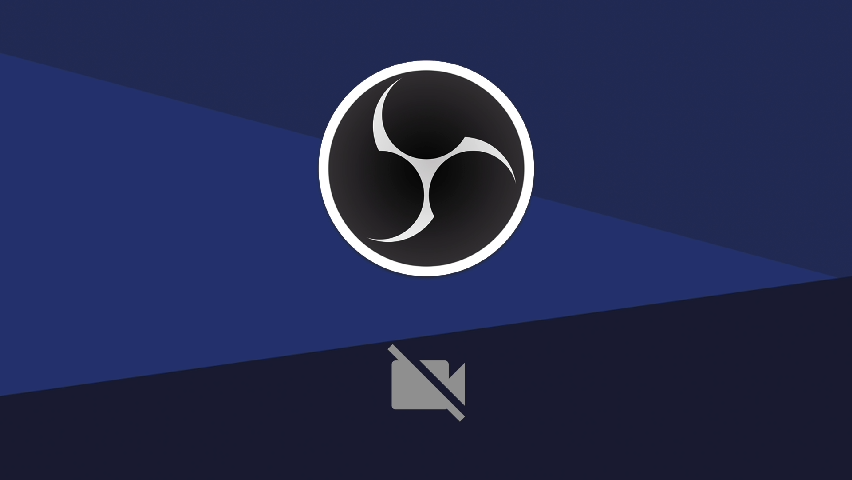

In [ ]:
from IPython.display import Image
try :
  filename = take_photo()
  print('Saved to {}'.format(filename))
 # filename1 = take_photo()
#print('Saved to {}'.format(filename1))
  #filename2 = take_photo()
 # print('Saved to {}'.format(filename2))
  # Show the image which was just taken.
  #plt.subplot(131);plt.imshow(filename)
  #plt.subplot(132);plt.imshow(filename1)
  #plt.subplot(133);plt.imshow(filename2)
  display(Image(filename))
except Exception as err:

  print(str(err))
  

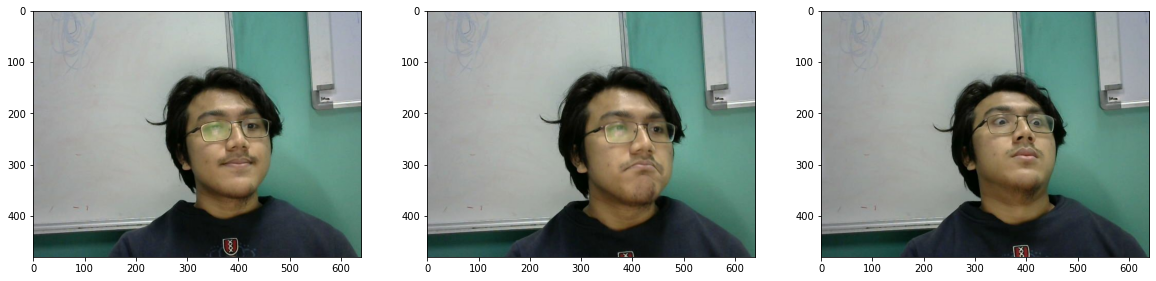

In [7]:
happy = cv2.imread("happy.png")
sad = cv2.imread("sad.png")
devastated = cv2.imread("devatated.png")
  
happy = cv2.cvtColor(happy, cv2.COLOR_BGR2RGB)
sad = cv2.cvtColor(sad, cv2.COLOR_BGR2RGB)
devastated = cv2.cvtColor(devastated, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,5))
plt.subplot(131);plt.imshow(happy)
plt.subplot(132);plt.imshow(sad)
plt.subplot(133);plt.imshow(devastated)

In [8]:
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

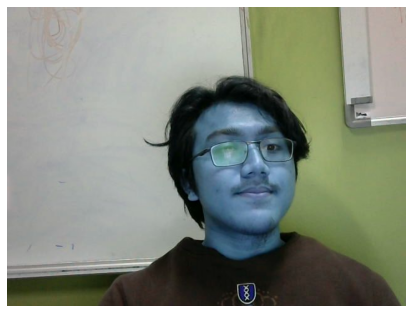

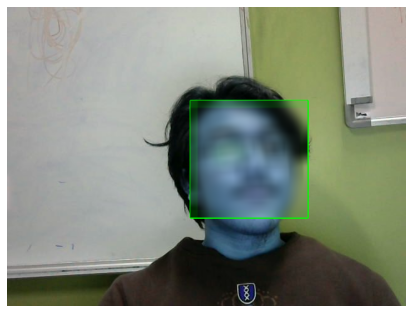

In [ ]:
# Importing libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

# A function for plotting the images


def plotImages(img):
	plt.imshow(img, cmap="gray")
	plt.axis('off')
	plt.style.use('seaborn')
	plt.show()


# Reading an image using OpenCV
# OpenCV reads images by default in BGR format
image = cv2.imread('happy.png')

# Converting BGR image into a RGB image
image1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plotting the original image
plotImages(image)

face_detect = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
face_data = face_detect.detectMultiScale(image1,1.3,3)

# Draw rectangle around the faces which is our region of interest (ROI)
for (x, y, w, h) in face_data:
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
	roi = image[y:y+h, x:x+w]
	# applying a gaussian blur over this new rectangle area
	roi = cv2.GaussianBlur(roi, (23, 23), 30)
	# impose this blurred image on original image to get final image
	image[y:y+roi.shape[0], x:x+roi.shape[1]] = roi


# Display the output
plotImages(image)


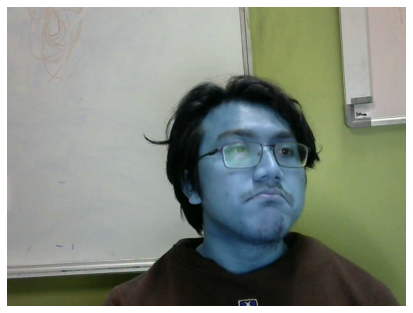

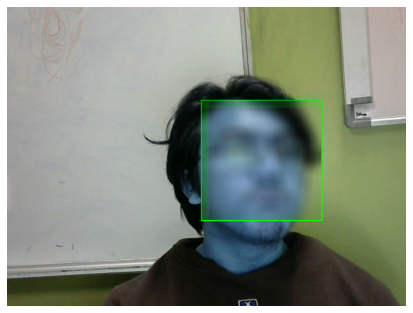

In [ ]:
# Importing libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

# A function for plotting the images


def plotImages(img):
	plt.imshow(img, cmap="gray")
	plt.axis('off')
	plt.style.use('seaborn')
	plt.show()


# Reading an image using OpenCV
# OpenCV reads images by default in BGR format
image = cv2.imread('sad.png')

# Converting BGR image into a RGB image
image1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plotting the original image
plotImages(image)

face_detect = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
face_data = face_detect.detectMultiScale(image1,1.3,3)

# Draw rectangle around the faces which is our region of interest (ROI)
for (x, y, w, h) in face_data:
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
	roi = image[y:y+h, x:x+w]
	# applying a gaussian blur over this new rectangle area
	roi = cv2.GaussianBlur(roi, (23, 23), 30)
	# impose this blurred image on original image to get final image
	image[y:y+roi.shape[0], x:x+roi.shape[1]] = roi


# Display the output
plotImages(image)


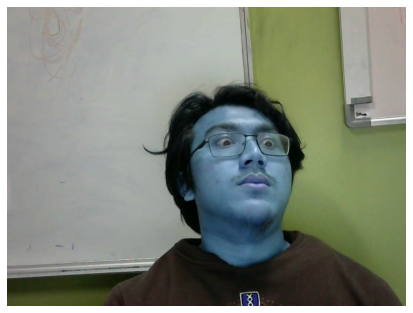

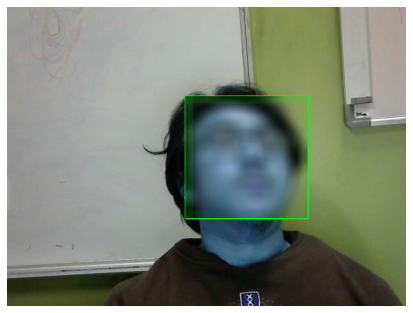

In [ ]:
# Importing libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

# A function for plotting the images


def plotImages(img):
	plt.imshow(img, cmap="gray")
	plt.axis('off')
	plt.style.use('seaborn')
	plt.show()


# Reading an image using OpenCV
# OpenCV reads images by default in BGR format
image = cv2.imread('devatated.png')

# Converting BGR image into a RGB image
image1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plotting the original image
plotImages(image)

face_detect = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
face_data = face_detect.detectMultiScale(image1,1.3,3)

# Draw rectangle around the faces which is our region of interest (ROI)
for (x, y, w, h) in face_data:
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
	roi = image[y:y+h, x:x+w]
	# applying a gaussian blur over this new rectangle area
	roi = cv2.GaussianBlur(roi, (23, 23), 30)
	# impose this blurred image on original image to get final image
	image[y:y+roi.shape[0], x:x+roi.shape[1]] = roi


# Display the output
plotImages(image)


In [10]:
img = cv2.imread('happy.png')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = cv2.GaussianBlur(gray,(23,3),0)

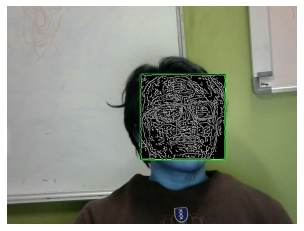

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# A function for plotting the images


def plotImages(img):
	plt.imshow(img, cmap="gray")
	plt.axis('off')
	plt.style.use('seaborn')
	plt.show()


# Reading an image using OpenCV
# OpenCV reads images by default in BGR format
image = cv2.imread('happy.png')


face_detect = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
face_data = face_detect.detectMultiScale(gray,1.3,3)
for (x, y, w, h) in face_data:
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
	roi = image[y:y+h, x:x+w]

	# applying a gaussian blur over this new rectangle area
	roi = cv2.Canny(roi, 23, 30)
	# impose this blurred image on original image to get final image
	image[y:y+roi.shape[0], x:x+roi.shape[1],] = np.expand_dims(roi, axis=-1)



# Display the output


plotImages(image)


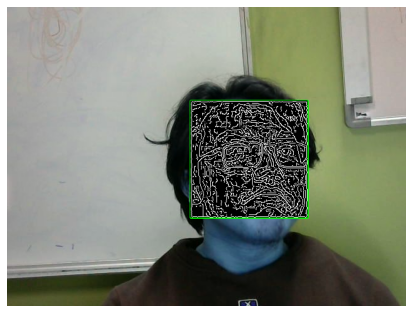

In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# A function for plotting the images


def plotImages(img):
	plt.imshow(img, cmap="gray")
	plt.axis('off')
	plt.style.use('seaborn')
	plt.show()


# Reading an image using OpenCV
# OpenCV reads images by default in BGR format
image = cv2.imread('sad.png')


face_detect = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
face_data = face_detect.detectMultiScale(gray,1.3,3)
for (x, y, w, h) in face_data:
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
	roi = image[y:y+h, x:x+w]

	# applying a gaussian blur over this new rectangle area
	roi = cv2.Canny(roi, 23, 30)
	# impose this blurred image on original image to get final image
	image[y:y+roi.shape[0], x:x+roi.shape[1],] = np.expand_dims(roi, axis=-1)



# Display the output


plotImages(image)


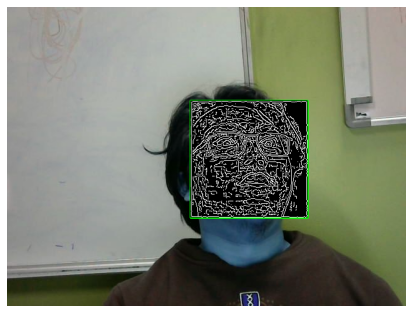

In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# A function for plotting the images


def plotImages(img):
	plt.imshow(img, cmap="gray")
	plt.axis('off')
	plt.style.use('seaborn')
	plt.show()


# Reading an image using OpenCV
# OpenCV reads images by default in BGR format
image = cv2.imread('devatated.png')


face_detect = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
face_data = face_detect.detectMultiScale(gray,1.3,3)
for (x, y, w, h) in face_data:
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
	roi = image[y:y+h, x:x+w]

	# applying a gaussian blur over this new rectangle area
	roi = cv2.Canny(roi, 23, 30)
	# impose this blurred image on original image to get final image
	image[y:y+roi.shape[0], x:x+roi.shape[1],] = np.expand_dims(roi, axis=-1)



# Display the output


plotImages(image)


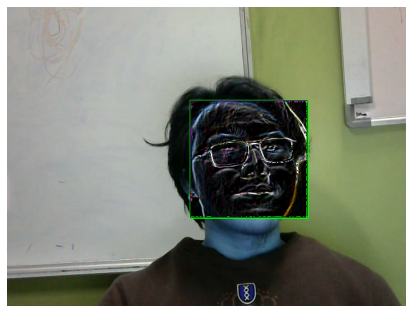

In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# A function for plotting the images


def plotImages(img):
	plt.imshow(img, cmap="gray")
	plt.axis('off')
	plt.style.use('seaborn')
	plt.show()


# Reading an image using OpenCV
# OpenCV reads images by default in BGR format
image = cv2.imread('happy.png')


face_detect = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
face_data = face_detect.detectMultiScale(gray,1.3,3)
for (x, y, w, h) in face_data:
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
	roi = image[y:y+h, x:x+w]

	# applying a gaussian blur over this new rectangle area
sobelx = cv2.Sobel(roi, cv2.CV_8U,1,0,ksize=3)
sobely = cv2.Sobel(roi, cv2.CV_8U,0,1,ksize=3)
roi = sobelx + sobely
	# impose this blurred image on original image to get final image
image[y:y+roi.shape[0], x:x+roi.shape[1],] = roi



# Display the output

plotImages(image)

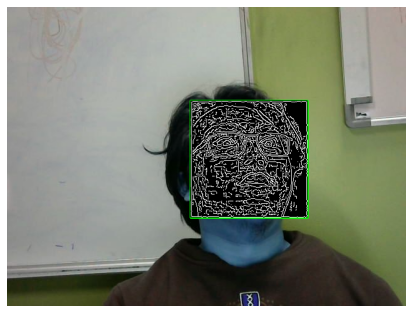

In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# A function for plotting the images


def plotImages(img):
	plt.imshow(img, cmap="gray")
	plt.axis('off')
	plt.style.use('seaborn')
	plt.show()


# Reading an image using OpenCV
# OpenCV reads images by default in BGR format
image = cv2.imread('devatated.png')


face_detect = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
face_data = face_detect.detectMultiScale(gray,1.3,3)
for (x, y, w, h) in face_data:
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
	roi = image[y:y+h, x:x+w]

	# applying a gaussian blur over this new rectangle area
	roi = cv2.Canny(roi, 23, 30)
	# impose this blurred image on original image to get final image
	image[y:y+roi.shape[0], x:x+roi.shape[1],] = np.expand_dims(roi, axis=-1)



# Display the output


plotImages(image)


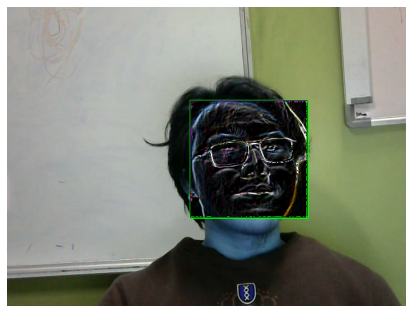

In [21]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# A function for plotting the images


def plotImages(img):
	plt.imshow(img, cmap="gray")
	plt.axis('off')
	plt.style.use('seaborn')
	plt.show()


# Reading an image using OpenCV
# OpenCV reads images by default in BGR format
image = cv2.imread('happy.png')


face_detect = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
face_data = face_detect.detectMultiScale(gray,1.3,3)
for (x, y, w, h) in face_data:
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
	roi = image[y:y+h, x:x+w]

	# applying a gaussian blur over this new rectangle area
sobelx = cv2.Sobel(roi, cv2.CV_8U,1,0,ksize=3)
sobely = cv2.Sobel(roi, cv2.CV_8U,0,1,ksize=3)
roi = sobelx + sobely
	# impose this blurred image on original image to get final image
image[y:y+roi.shape[0], x:x+roi.shape[1],] = roi



# Display the output

plotImages(image)

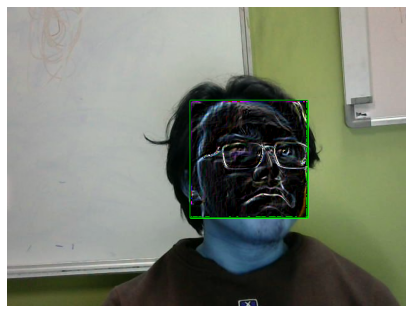

In [18]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# A function for plotting the images


def plotImages(img):
	plt.imshow(img, cmap="gray")
	plt.axis('off')
	plt.style.use('seaborn')
	plt.show()


# Reading an image using OpenCV
# OpenCV reads images by default in BGR format
image = cv2.imread('sad.png')


face_detect = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
face_data = face_detect.detectMultiScale(gray,1.3,3)
for (x, y, w, h) in face_data:
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
	roi = image[y:y+h, x:x+w]

	# applying a gaussian blur over this new rectangle area
sobelx = cv2.Sobel(roi, cv2.CV_8U,1,0,ksize=3)
sobely = cv2.Sobel(roi, cv2.CV_8U,0,1,ksize=3)
roi = sobelx + sobely
	# impose this blurred image on original image to get final image
image[y:y+roi.shape[0], x:x+roi.shape[1],] = roi



# Display the output

plotImages(image)

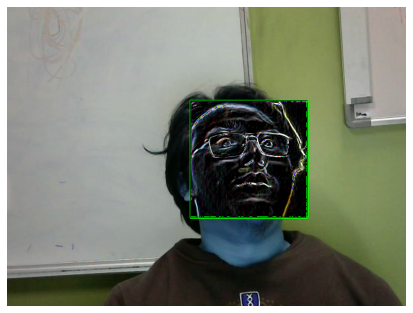

In [19]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# A function for plotting the images


def plotImages(img):
	plt.imshow(img, cmap="gray")
	plt.axis('off')
	plt.style.use('seaborn')
	plt.show()


# Reading an image using OpenCV
# OpenCV reads images by default in BGR format
image = cv2.imread('devatated.png')


face_detect = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
face_data = face_detect.detectMultiScale(gray,1.3,3)
for (x, y, w, h) in face_data:
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
	roi = image[y:y+h, x:x+w]

	# applying a gaussian blur over this new rectangle area
sobelx = cv2.Sobel(roi, cv2.CV_8U,1,0,ksize=3)
sobely = cv2.Sobel(roi, cv2.CV_8U,0,1,ksize=3)
roi = sobelx + sobely
	# impose this blurred image on original image to get final image
image[y:y+roi.shape[0], x:x+roi.shape[1],] = roi



# Display the output

plotImages(image)